 # Polynomial

In [77]:
#import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [42]:
#load the dataset
data = pd.read_csv("mpg_clean.csv")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin,car_years
0,18.0,8,307.0,130.0,3504,12.0,usa,55
1,15.0,8,350.0,165.0,3693,11.5,usa,55
2,18.0,8,318.0,150.0,3436,11.0,usa,55
3,16.0,8,304.0,150.0,3433,12.0,usa,55
4,17.0,8,302.0,140.0,3449,10.5,usa,55


In [43]:
data.shape

(398, 8)

In [44]:
X = data[["mpg"]]
y = data["horsepower"]

X.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [45]:
#create polymonial feature
poly = PolynomialFeatures(degree=2)

x_poly = poly.fit_transform(X)
x_poly.astype("int")[:5]

array([[  1,  18, 324],
       [  1,  15, 225],
       [  1,  18, 324],
       [  1,  16, 256],
       [  1,  17, 289]])

In [46]:
#split data into train and test set
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size= 0.3, random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape 

((278, 3), (120, 3), (278,), (120,))

In [47]:
#scale the features
sc = StandardScaler()
x_train_s = sc.fit_transform(x_train)
x_test_s = sc.transform(x_test)

In [48]:
#create the model
lr = LinearRegression()
lr.fit(x_train_s, y_train)

LinearRegression()

# Feature selection

In [49]:
#load the dataset
df = data.copy()
del df["origin"]
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,car_years
0,18.0,8,307.0,130.0,3504,12.0,55
1,15.0,8,350.0,165.0,3693,11.5,55
2,18.0,8,318.0,150.0,3436,11.0,55
3,16.0,8,304.0,150.0,3433,12.0,55
4,17.0,8,302.0,140.0,3449,10.5,55
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,43
394,44.0,4,97.0,52.0,2130,24.6,43
395,32.0,4,135.0,84.0,2295,11.6,43
396,28.0,4,120.0,79.0,2625,18.6,43


In [84]:
print(plt.colormaps(), end=" ")

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', '

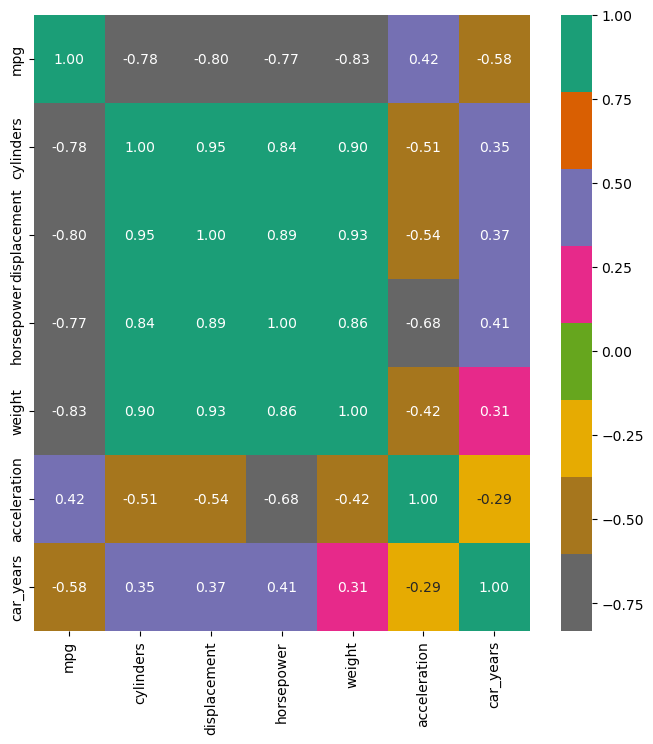

In [87]:
#create 
plt.figure(figsize=(8,8))
corr = df.corr()

sns.heatmap(corr, annot=True, fmt='.2f', cmap="Dark2_r");

In [55]:
#import library
from sklearn.feature_selection import RFE

In [56]:
#instatiate the model
X = df.drop("mpg", axis = 1)
y= df.mpg


In [54]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= .3, random_state=42) 

In [71]:
#do feature selction

lr1 = LinearRegression()

rbf = RFE(lr1, n_features_to_select=3, step=1)
rbf = rbf.fit(x_train, y_train)
rbf

RFE(estimator=LinearRegression(), n_features_to_select=3)

In [72]:
x_train.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'car_years'],
      dtype='object')

In [73]:
rbf.support_

array([ True, False, False, False,  True,  True])

In [74]:
#get the selected features
rbf.get_feature_names_out()

array(['cylinders', 'acceleration', 'car_years'], dtype=object)

In [75]:
rbf.ranking_

array([1, 4, 2, 3, 1, 1])

In [64]:
X = df[['cylinders', 'horsepower', 'acceleration', 'car_years', 'weight']]

 # RIDGE, LASSO, ELASTIC NET

In [89]:
#import library
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [90]:
#create Ridge model
#instatiate the model
X = df.drop("mpg", axis = 1)
y= df.mpg

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= .3, random_state=42) 

In [92]:
#create model

model = Ridge(alpha=1.0)
model.fit(x_train, y_train)

Ridge()

In [94]:
#check training score
model.score(x_train, y_train)

0.7979488273003053

In [96]:
#predict
y_pred = model.predict(x_test)


result = pd.DataFrame({
      "actual" : y_test.values,
      "predicted": y_pred
})
result.sample(10)

,actual,predicted
118,37.3,31.415908
55,14.0,9.004295
31,36.0,34.859173
110,32.0,30.254947
104,18.0,19.266931
51,34.1,32.513591
71,14.0,13.656575
81,27.0,24.349112
59,19.0,20.642823
9,21.0,22.847702


In [98]:
#check the metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

In [100]:
r2_score = r2_score(y_test, y_pred)
r2_score

0.8260231778381382

In [101]:
MAE = mean_absolute_error(y_test, y_pred)
MAE

2.5577685070150475

In [102]:
RMSE = root_mean_squared_error(y_test, y_pred)
RMSE

3.1598682106891616

In [103]:
model.coef_

array([ 0.26180283, -0.00652933,  0.01022374, -0.00674306,  0.12151398,
       -0.79972986])

# LASSO

In [109]:
#create Ridge model
#instatiate the model
X = df.drop("mpg", axis = 1)
y= df.mpg

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= .3, random_state=42) 

#create model

model1 = Lasso(alpha=1.0)
model1.fit(x_train, y_train)

#check training score
model1.score(x_train, y_train)

0.7955042063501919

In [113]:
y_pred =model1.predict(x_test) 


In [117]:
x_train.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'car_years'],
      dtype='object')

In [116]:
model1.coef_

array([ 0.        , -0.0051306 , -0.00203704, -0.00625067,  0.        ,
       -0.70091131])

In [119]:
## Elastic Net

#create Ridge model
#instatiate the model
X = df.drop("mpg", axis = 1)
y= df.mpg

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= .3, random_state=42) 

#create model

model1 = ElasticNet(alpha=1.0, l1_ratio=0.5)
model1.fit(x_train, y_train)

#check training score
model1.score(x_train, y_train)

0.7958663816986249

In [120]:
model1.coef_

array([ 0.        , -0.00501442, -0.00262494, -0.00622716,  0.        ,
       -0.7127426 ])

## assignment(optional)

create a poisson model

In [122]:
#import library
from sklearn.linear_model import PoissonRegressor
PoissonRegressor?

## CHI Square

In [124]:
data = sns.load_dataset("tips")
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<Axes: xlabel='sex'>

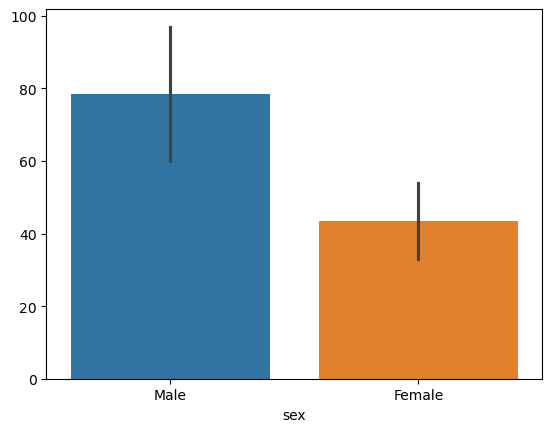

In [128]:
crosstab = pd.crosstab(data["smoker"], data["sex"])
sns.barplot(crosstab)